## Step 0: Import dataset

In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
sns.set(style="whitegrid", color_codes=True)
import time as time
import os
from IPython.display import display # Allows the use of display() for DataFrame

#pretty display for notebooks
%matplotlib inline

data = pd.read_csv("ADS.csv")
display(data.head(7))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,4-11 years,?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES


In [2]:
data.shape 
#Number of Instances (records in your data set): 292
#Number of Attributes (fields within each record): 21

(292, 21)

In [3]:
print(data.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice_born', 'Autism', 'Country', 'Used_app_before',
       'result', 'Age_desc', 'Relation', 'Class'],
      dtype='object')


In [4]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  141
Individuals not diagonised with ASD:  151
Percentage of individuals diagonised with ASD:  48.28767123287671


## Data preparation


In [5]:
asd_data = pd.read_csv('ADS.csv', na_values=['?'])
asd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [6]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [7]:
data.info()
#we have 10 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         292 non-null    int64 
 1   A2_Score         292 non-null    int64 
 2   A3_Score         292 non-null    int64 
 3   A4_Score         292 non-null    int64 
 4   A5_Score         292 non-null    int64 
 5   A6_Score         292 non-null    int64 
 6   A7_Score         292 non-null    int64 
 7   A8_Score         292 non-null    int64 
 8   A9_Score         292 non-null    int64 
 9   A10_Score        292 non-null    int64 
 10  Age              292 non-null    object
 11  Gender           292 non-null    object
 12  Ethnicity        292 non-null    object
 13  Jaundice_born    292 non-null    object
 14  Autism           292 non-null    object
 15  Country          292 non-null    object
 16  Used_app_before  292 non-null    object
 17  result           292 non-null    in

In [8]:
asd_data.info()
# Now we can see that missing values are randomly spread over the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  Age              288 non-null    float64
 11  Gender           292 non-null    object 
 12  Ethnicity        249 non-null    object 
 13  Jaundice_born    292 non-null    object 
 14  Autism           292 non-null    object 
 15  Country          292 non-null    object 
 16  Used_app_before  292 non-null    object 
 17  result          

In [9]:
data['Gender'].value_counts()

asd_data['Gender'].value_counts()

Gender
m    208
f     84
Name: count, dtype: int64

In [10]:
data["Country"].value_counts()

asd_data["Country"].value_counts()

Country
United Kingdom           49
India                    42
United States            42
Australia                23
Jordan                   20
New Zealand              13
Egypt                     9
United Arab Emirates      7
Canada                    7
Bangladesh                6
Philippines               4
Pakistan                  4
Saudi Arabia              4
Russia                    3
Syria                     3
Iraq                      3
Qatar                     3
Armenia                   3
Libya                     3
Afghanistan               2
Georgia                   2
Bahrain                   2
Italy                     2
Malaysia                  2
Austria                   2
Brazil                    2
Turkey                    2
Lebanon                   2
Mexico                    2
South Africa              2
Ghana                     1
U.S. Outlying Islands     1
Nigeria                   1
Nepal                     1
Isle of Man               1
China       

In [11]:
data["Relation"].value_counts()

asd_data["Relation"].value_counts()

Relation
Parent                      214
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: count, dtype: int64

In [12]:
data['Class'].value_counts()

asd_data["Class"].value_counts()

Class
NO     151
YES    141
Name: count, dtype: int64

In [13]:
y = data['Class'].map({'YES': 1, 'NO': 0})

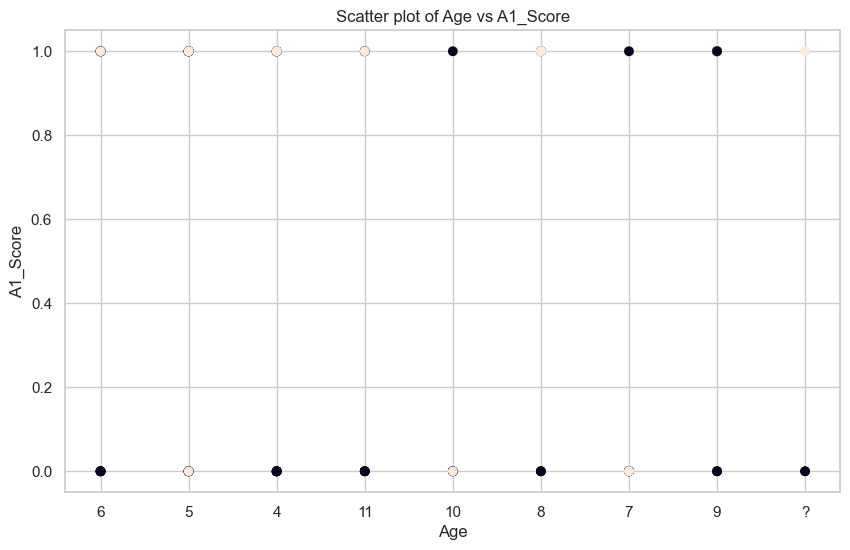

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['A1_Score'], c=y)
plt.xlabel('Age')
plt.ylabel('A1_Score')
plt.title('Scatter plot of Age vs A1_Score')
plt.show()

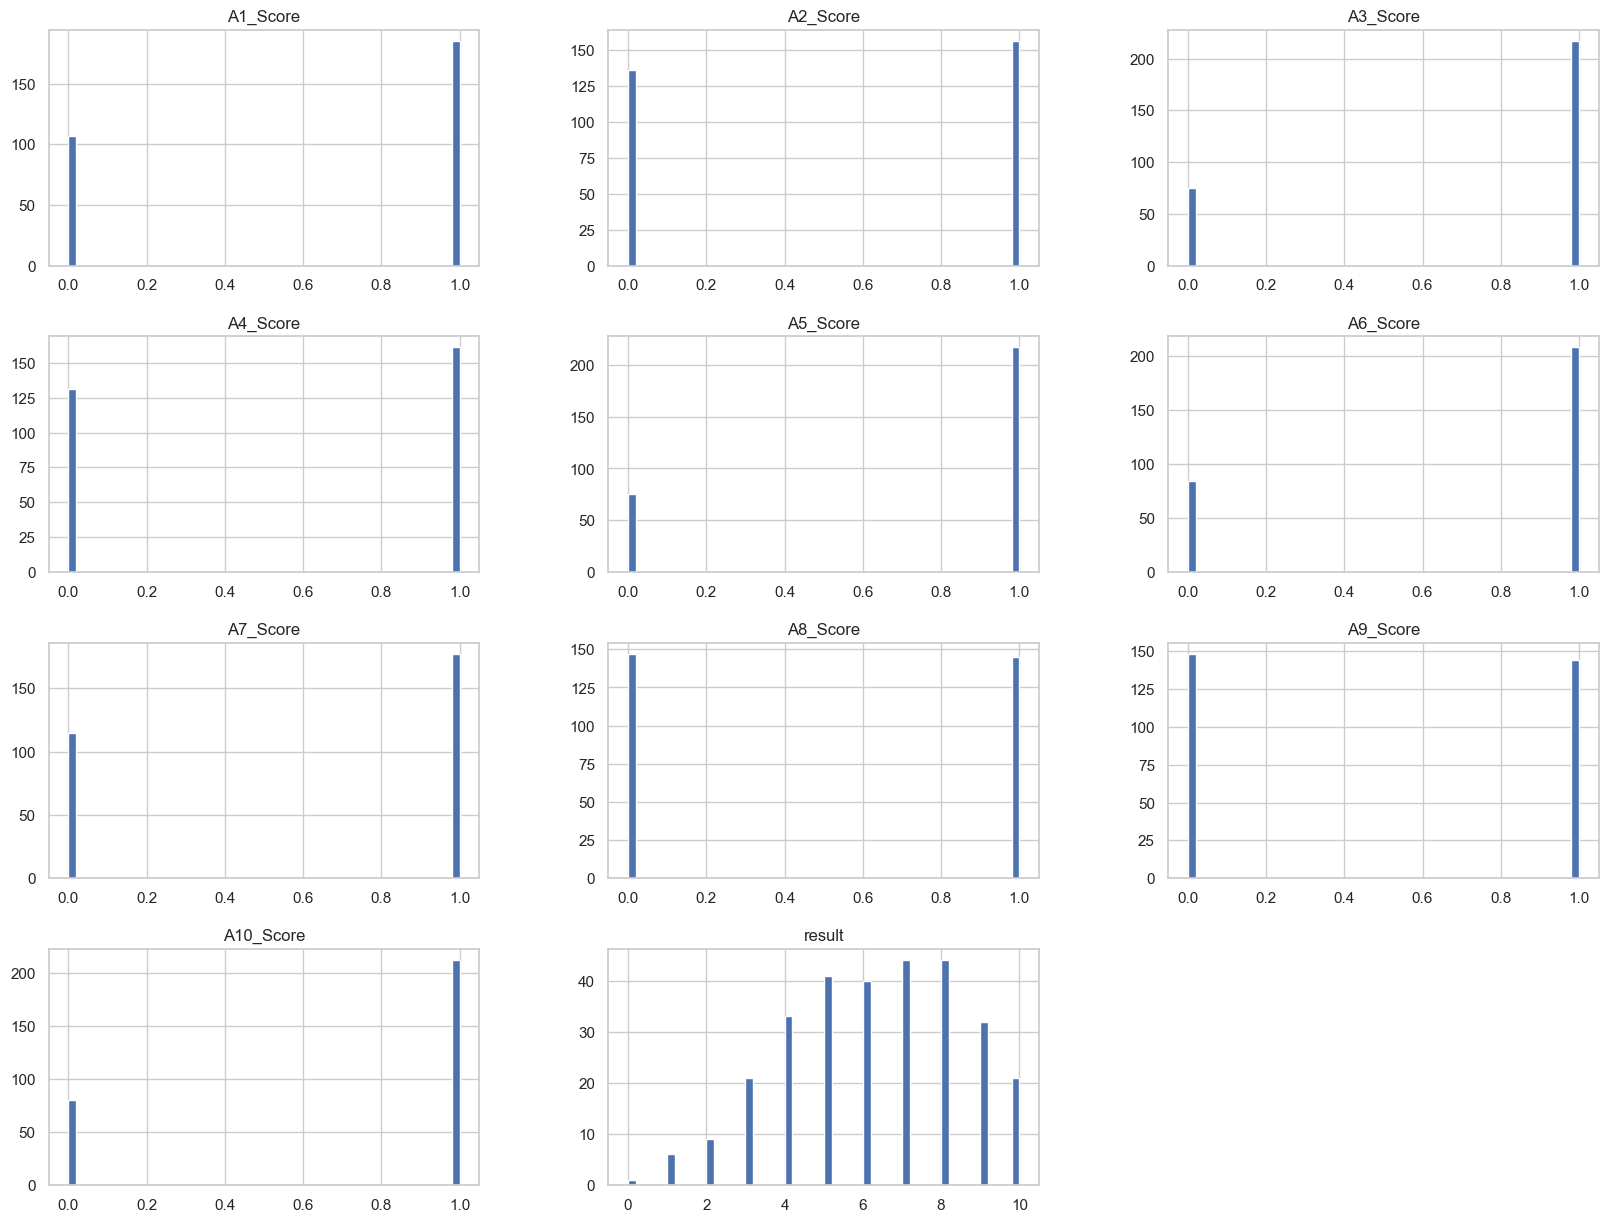

In [15]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Step 1: Cleaning data

In [16]:
#since the missing data seems randomly distributed, I go ahead and drop rows with missing data.
#If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

asd_data.loc[(asd_data['Age'].isnull()) |(asd_data['Gender'].isnull()) |(asd_data['Ethnicity'].isnull()) 
            |(asd_data['Jaundice_born'].isnull())|(asd_data['Autism'].isnull()) |(asd_data['Country'].isnull())
            |(asd_data['Used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['Age_desc'].isnull())
            |(asd_data['Relation'].isnull())]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
5,0,0,1,0,1,1,0,1,0,1,...,m,NaN,no,yes,Egypt,no,5,4-11 years,NaN,NO
9,0,0,1,1,1,0,1,1,0,0,...,f,NaN,no,yes,Austria,no,5,4-11 years,NaN,NO
11,0,1,0,0,1,0,0,0,0,1,...,f,NaN,no,no,Kuwait,no,3,4-11 years,NaN,NO
19,1,1,1,1,1,1,0,1,0,1,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
21,0,0,1,1,0,1,0,1,1,0,...,f,NaN,no,no,Egypt,no,5,4-11 years,NaN,NO
24,1,0,1,1,1,1,0,1,1,1,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
28,0,1,1,0,0,0,1,1,0,1,...,m,NaN,no,yes,United Arab Emirates,no,5,4-11 years,NaN,NO
32,1,0,0,1,0,1,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,4-11 years,NaN,YES


## Step 2: Data visualization


<Axes: xlabel='Jaundice_born', ylabel='result'>

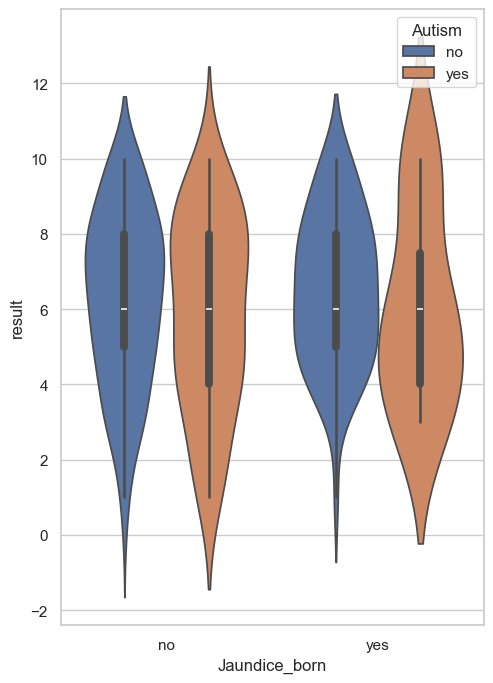

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Jaundice_born', y = 'result',hue="Autism", data = asd_data[0:])

<Axes: xlabel='Used_app_before', ylabel='result'>

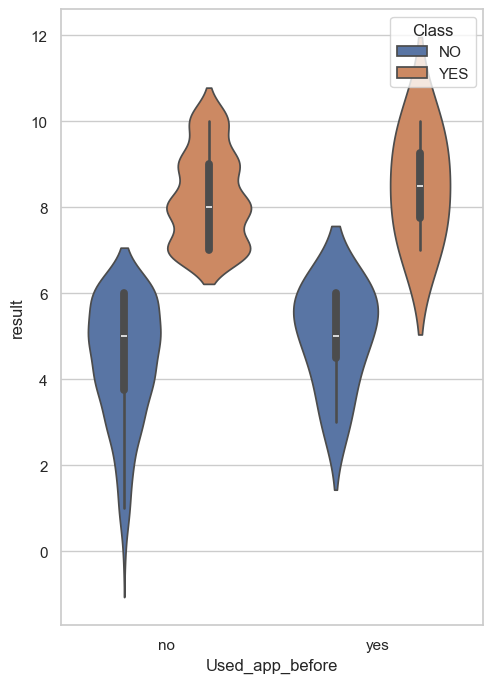

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Used_app_before', y = 'result',hue="Class", data = asd_data[0:])

<Axes: xlabel='Gender', ylabel='result'>

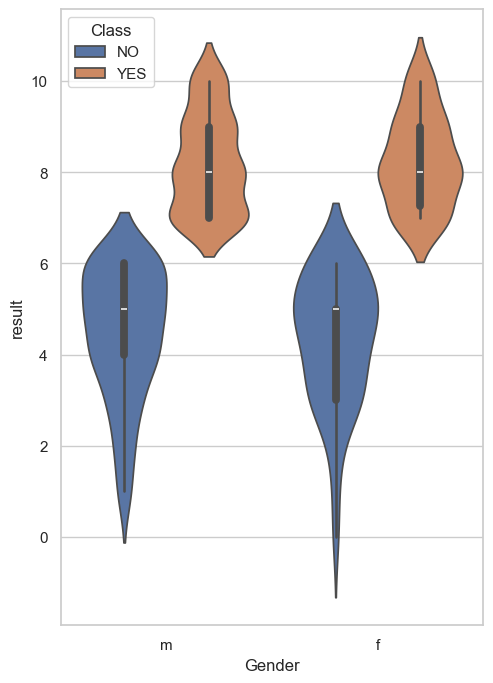

In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Gender', y = 'result',hue="Class", data = asd_data[0:])

<Axes: xlabel='Jaundice_born', ylabel='result'>

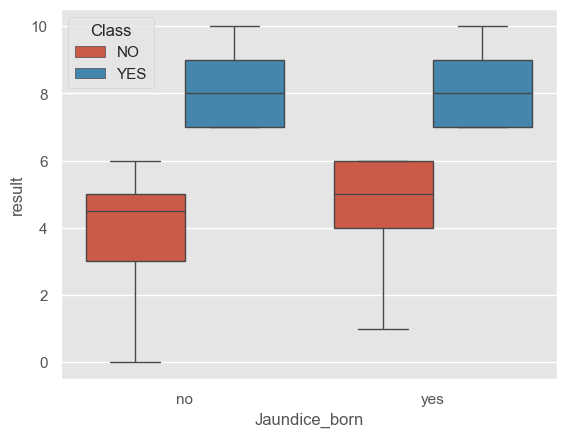

In [20]:
plt.style.use("ggplot")
sns.boxplot(x = 'Jaundice_born',y = "result", hue="Class", data= asd_data)

<Axes: xlabel='Gender', ylabel='result'>

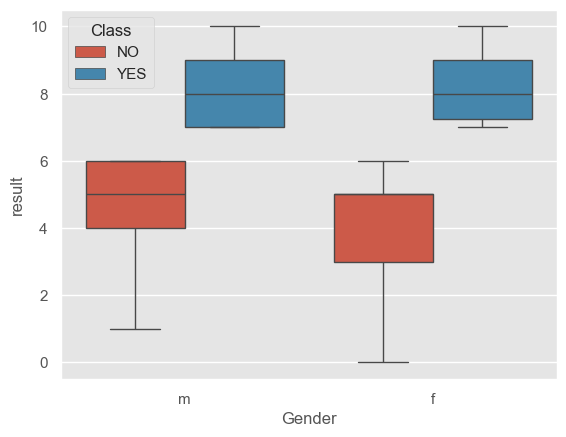

In [21]:
plt.style.use("ggplot")
sns.boxplot(x = 'Gender',y = "result", hue="Class", data= asd_data)

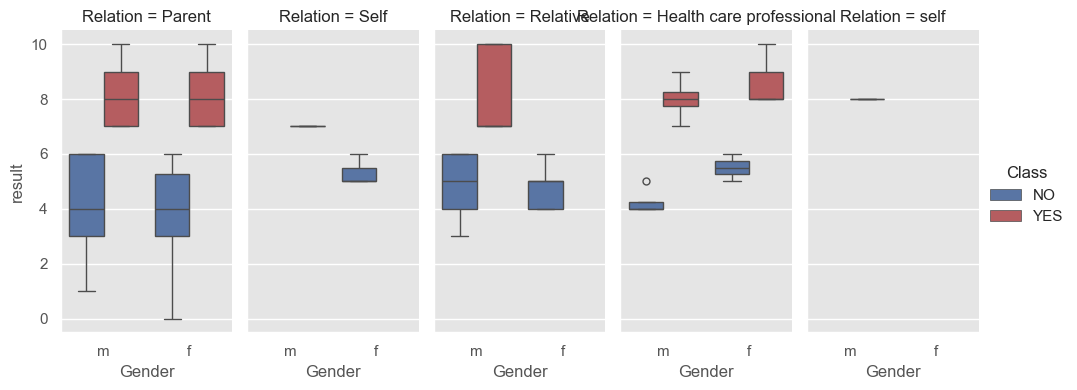

In [22]:
sns.catplot(x="Gender", y="result", hue="Class",
               col="Relation", data=asd_data, kind ="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19008\3543439082.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  g = sns.catplot(x="result", y="Jaundice_born",


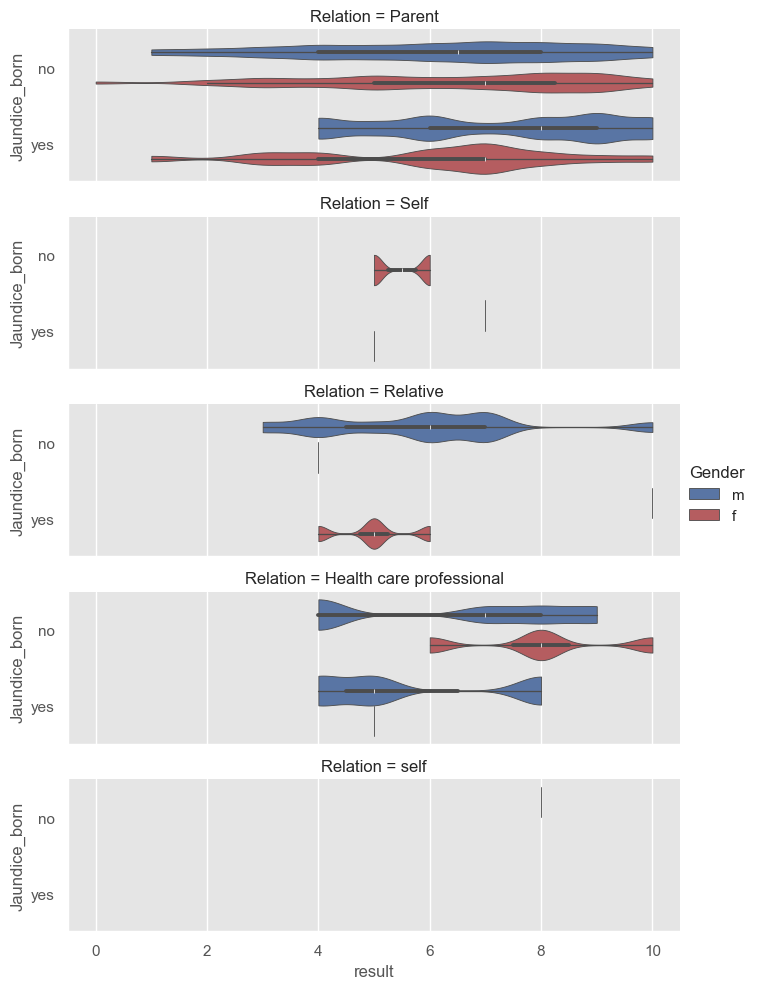

In [23]:
g = sns.catplot(x="result", y="Jaundice_born",
                   hue="Gender", row="Relation",
                   data=asd_data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In [24]:
asd_raw = asd_data['Class']
features_raw = asd_data[['Age', 'Gender', 'Ethnicity', 'Jaundice_born', 'Autism', 'Country', 'result',
                      'Used_app_before','Relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

### Normalizing data using MinMaxScalar()

In [25]:
scaler = MinMaxScaler()
numerical = ['Age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))


,Age,Gender,Ethnicity,Jaundice_born,Autism,Country,result,Used_app_before,Relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,Middle Eastern,no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
2,0.285714,m,NaN,no,no,Jordan,0.5,yes,NaN,1,1,0,0,0,1,1,1,0,0
3,0.142857,f,NaN,yes,no,Jordan,0.4,no,NaN,0,1,0,0,1,1,0,0,0,1
4,0.142857,m,Others,yes,no,United States,1.0,no,Parent,1,1,1,1,1,1,1,1,1,1


In [26]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


,Age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Used_app_before_no,Used_app_before_yes,Relation_Health care professional,Relation_Parent,Relation_Relative,Relation_Self,Relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,False,False,False,True,False,False,True,False,False,False
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,False,False,False,True,False,False,True,False,False,False
2,0.285714,0.5,1,1,0,0,0,1,1,1,...,False,False,False,False,True,False,False,False,False,False
3,0.142857,0.4,0,1,0,0,1,1,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,False,False,True,True,False,False,True,False,False,False


87 total features after one-hot encoding. 
['Age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Gender_f', 'Gender_m', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Middle Eastern ', 'Ethnicity_Others', 'Ethnicity_Pasifika', 'Ethnicity_South Asian', 'Ethnicity_Turkish', 'Ethnicity_White-European', 'Jaundice_born_no', 'Jaundice_born_yes', 'Autism_no', 'Autism_yes', 'Country_Afghanistan', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Bhutan', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_China', 'Country_Costa Rica', 'Country_Egypt', 'Country_Europe', 'Country_Georgia', 'Country_Germany', 'Country_Ghana', 'Country_India', 'Country_Iraq', 'Country_Ireland', 'Country_Isle of Man', 'Country_Italy', 'Country_Japan', 'Country_Jordan', 'Country_Kuwait', 'Country_

Text(0, 0.5, 'Frequency')

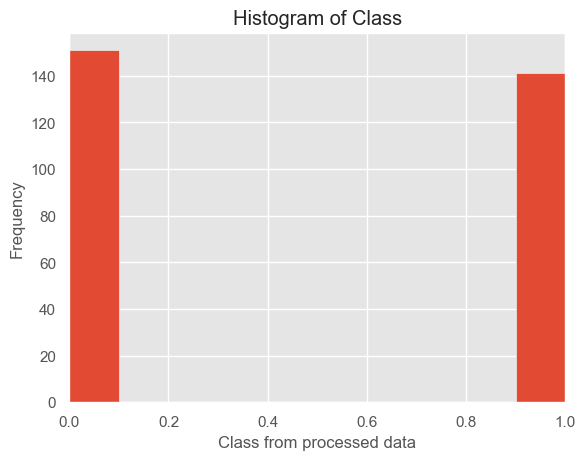

In [27]:
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class')
plt.xlabel('Class from processed data')
plt.ylabel('Frequency')


In [28]:
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 233 samples.
Testing set has 59 samples.


In [29]:
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

In [30]:
X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)

## Step 3: Modelling

## 1) Decision Trees

In [31]:
dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## *Evaluating Model* 

In [32]:
y_pred_class = dectree.predict(X_test)

In [33]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]
False: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]


In [34]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[28  0]
 [ 0 31]]


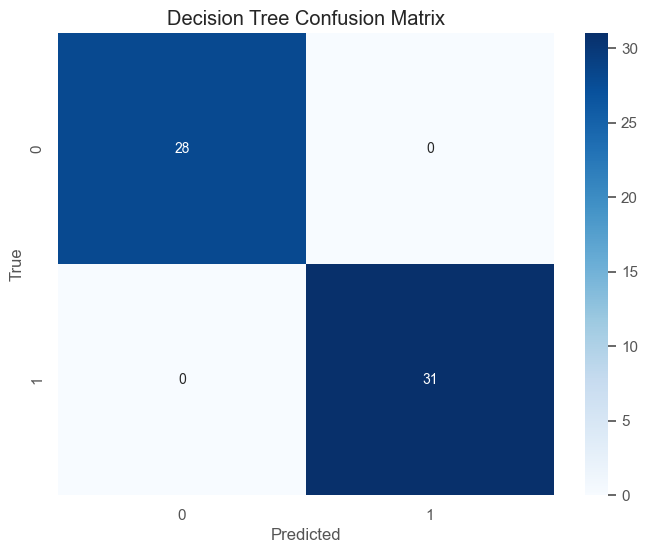

In [35]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## *Metrics*

### 1) Classification Accuracy

In [36]:
#print((TP + TN) / float(TP + TN + FP + FN))
# Calculate the accuracy, precision, f1 score and recall
acc = (TP + TN) / (TP + TN + FP + FN)
acc_percent = acc * 100
print("Accuracy: ", acc_percent, "%")

Accuracy:  100.0 %


### 2) Sensitivity

In [37]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
#print(metrics.recall_score(y_test, y_pred_class))

1.0


### 3) Specificity

In [38]:
specificity = TN / (TN + FP)

print(specificity)

1.0


### FPR

In [39]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


### 5) precision

In [40]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))


1.0


### 6) Recall

In [41]:
recall = TP / (TP + FN)
print("Recall: ", recall)

Recall:  1.0


### 7) F1 Score

In [42]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score)

F1 Score:  1.0


In [43]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]


array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [44]:
dectree.predict_proba(X_test)[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [45]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

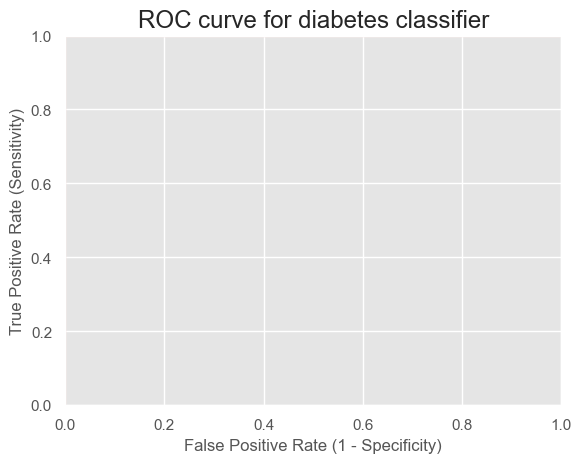

In [46]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [47]:
dectree.score(X_test, y_test)

1.0

In [48]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

### *Cross Validation*

In [49]:
dectree = DecisionTreeClassifier(random_state=2)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [50]:
## AUC SCORE : its a percentage of ROC plot
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

### 2) Random Forest

In [51]:
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train, y_train)
ranfor_predictions_test = ranfor.predict(X_test)

In [52]:
rf_cv_scores_auc = cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
print("Random Forest Cross-Validated AUC Score: {:.2f}%".format(rf_cv_scores_auc * 100))

Random Forest Cross-Validated AUC Score: 98.38%


In [53]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, ranfor_predictions_test)

# Convert decimal accuracy to percentage
accuracy_percent = accuracy * 100

print("Accuracy: {:.4f}%".format(accuracy_percent))

Accuracy: 91.5254%


In [54]:
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train,y_train)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9557471264367816

In [55]:
ranfor_predictions_test = ranfor.predict(X_test)
print(metrics.classification_report(y_test, ranfor_predictions_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.96      0.87      0.92        31

    accuracy                           0.92        59
   macro avg       0.92      0.92      0.92        59
weighted avg       0.92      0.92      0.92        59



In [56]:
# Compute confusion matrix
conf_mat_ranfor = confusion_matrix(y_test, ranfor_predictions_test)

In [57]:
print("\nRandom Forest Confusion Matrix:")
print(conf_mat_ranfor)


Random Forest Confusion Matrix:
[[27  1]
 [ 4 27]]


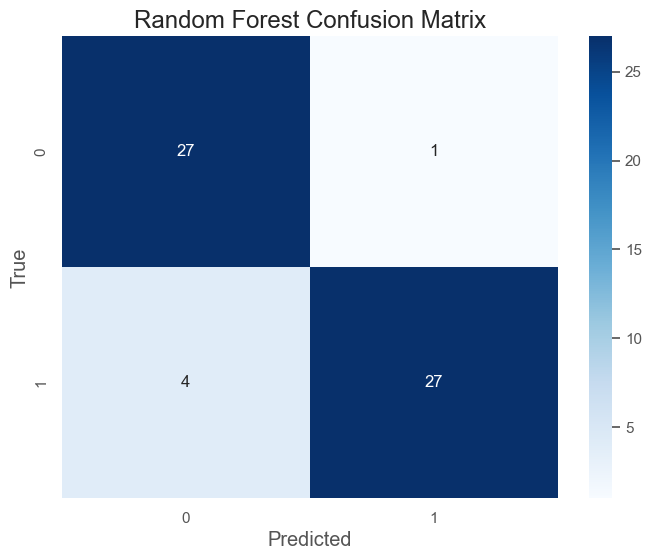

In [58]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_ranfor, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [59]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()


0.9838075396825398

In [60]:
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9440559440559441

### 3) Logistic Regression

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9827586206896551

In [62]:
# calculate cross-validated AUC
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9990476190476191

In [63]:
y_pred_logreg = logreg.predict(X_test)

In [64]:
print("Logistic Regression Accuracy: {:.4f}%".format(accuracy_score(y_test, y_pred_logreg)*100))
print("Logistic Regression Precision: {:.4f}".format(precision_score(y_test, y_pred_logreg, average='binary')))
print("Logistic Regression Recall: {:.4f}".format(recall_score(y_test, y_pred_logreg, average='binary')))


Logistic Regression Accuracy: 96.6102%
Logistic Regression Precision: 0.9677
Logistic Regression Recall: 0.9677


In [65]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score)

F1 Score:  1.0


In [66]:
# Compute confusion matrix
conf_mat_logreg = confusion_matrix(y_test, y_pred_logreg)

In [67]:
print("\nLogistic Regression Confusion Matrix:")
print(conf_mat_logreg)


Logistic Regression Confusion Matrix:
[[27  1]
 [ 1 30]]


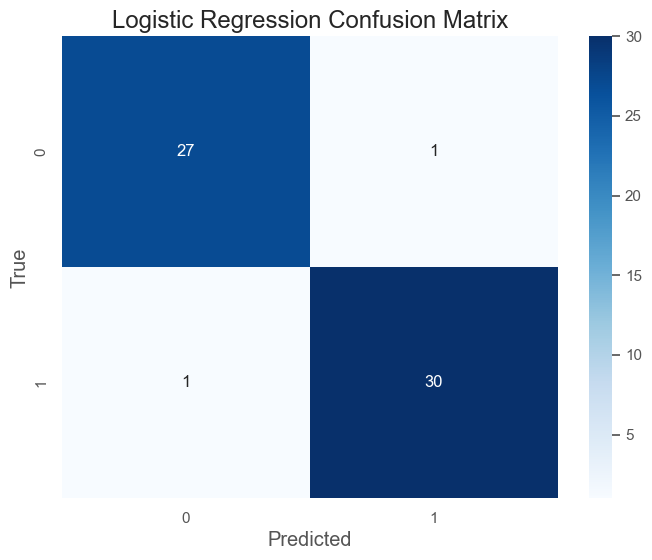

In [68]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [69]:
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9677419354838711

### 4) SVM 

In [70]:
# Create the SVM model
svm = SVC(kernel='linear', random_state=1)

In [71]:
# Fit the SVM model
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=1)

In [72]:
# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

In [73]:
print("SVM Accuracy: {:.4f}%".format(accuracy_score(y_test, y_pred_svm)*100))
print("SVM Precision: {:.4f}".format(precision_score(y_test, y_pred_svm, average='binary')))
print("SVM Recall: {:.4f}".format(recall_score(y_test, y_pred_svm, average='binary')))
#print("SVM F1-Score: {:.4f}".format(f1_score(y_test, y_pred_svm, average='binary')))

SVM Accuracy: 100.0000%
SVM Precision: 1.0000
SVM Recall: 1.0000


In [74]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score)

F1 Score:  1.0


In [75]:
# Compute confusion matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

In [76]:
print("SVM Confusion Matrix:")
print(conf_mat_svm)

SVM Confusion Matrix:
[[28  0]
 [ 0 31]]


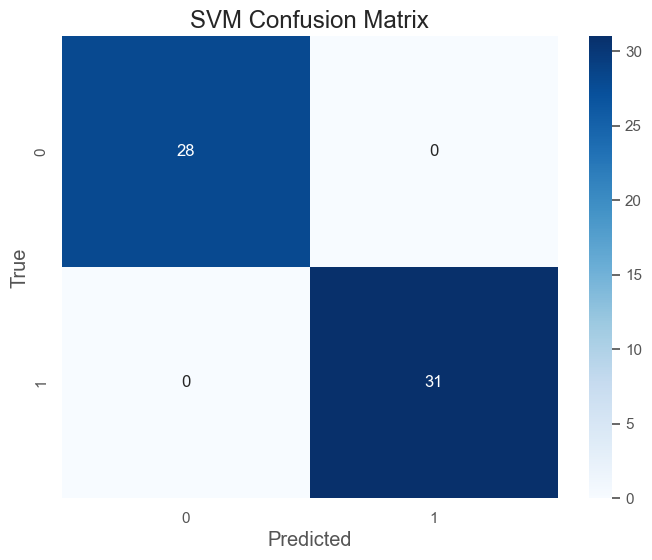

In [77]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

In [78]:
#from sklearn.svm import SVC

#svm = SVC(kernel='linear')
#svm.fit(X_train, y_train)

In [79]:
#C = 1.0
svc = SVC(kernel='linear')


In [80]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9965517241379309

In [81]:
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [82]:
#f1-beta score
svc.fit(X_train, y_train)
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

In [83]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


#Initialize the classifier
clf = SVC(random_state = 1)

#Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9322
F-score on testing data: 0.9712

Optimized Model
------
Final accuracy score on the testing data: 0.9661
Final F-score on the testing data: 0.9864


In this GridSearchCV methos, we came up with the best result when the kernel was selected as linear.